## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [229]:
import pandas as pd

In [230]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [231]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [233]:
df.isnull().sum()   # no null values in dataset

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [234]:
print(df.duplicated().unique())   #no duplicated value in dataframe.

[False]


In [235]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [236]:
from sklearn.preprocessing import MinMaxScaler    #using min_max_scaler for feature engineering.
mmx = MinMaxScaler()
scaled_data = mmx.fit_transform(df) 

In [237]:
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [238]:
scaled_df.shape   #shape after scaling

(178, 13)

In [239]:
df.shape

(178, 13)

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [241]:
import warnings
warnings.filterwarnings('ignore')

In [242]:
#elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km1 = KMeans(n_clusters=i)
    km1.fit(scaled_df)
    wcss.append(km1.inertia_)

In [243]:
km1.cluster_centers_

array([[0.35877193, 0.11616162, 0.33719548, 0.36168385, 0.2173913 ,
        0.50727969, 0.39052977, 0.26624738, 0.33648791, 0.1935438 ,
        0.54878049, 0.55067155, 0.17926771],
       [0.64155125, 0.20303724, 0.65775401, 0.45984807, 0.40331808,
        0.57876588, 0.49711304, 0.36544191, 0.38004317, 0.26383151,
        0.53444587, 0.66820898, 0.52117276],
       [0.64566563, 0.48965357, 0.5970431 , 0.57398423, 0.32608696,
        0.28194726, 0.10660213, 0.60932297, 0.32287994, 0.72083918,
        0.12434242, 0.14307261, 0.268482  ],
       [0.43070175, 0.1301054 , 0.45008913, 0.36254296, 0.3134058 ,
        0.33448276, 0.12587904, 0.84591195, 0.13564669, 0.35068259,
        0.32926829, 0.13492063, 0.26117451],
       [0.75825359, 0.20939633, 0.59212445, 0.3163074 , 0.3784585 ,
        0.70470219, 0.61737629, 0.29502573, 0.5572125 , 0.452296  ,
        0.50997783, 0.61904762, 0.73323823],
       [0.34385965, 0.09749671, 0.32442068, 0.32302405, 0.86594203,
        0.38045977, 0.30801

In [244]:
wcss

[95.5995377847106,
 64.53766702389431,
 48.96051713667649,
 45.186420638471716,
 43.06524758380779,
 40.49029341957158,
 37.98022814932523,
 36.797013519375966,
 36.08616966692673,
 33.665014536138926,
 32.96337629704403,
 31.717425261814768,
 31.013572021971846,
 29.52280993668865]

In [245]:
#knee locator
from kneed import KneeLocator
kneedle = KneeLocator(range(1,15),wcss,curve="convex", direction="decreasing")
kneedle

In [246]:
kneedle.plot_knee

<bound method KneeLocator.plot_knee of <kneed.knee_locator.KneeLocator object at 0x000001D93CC14CE0>>

In [247]:
kneedle.knee    #optimal number of clusters

3

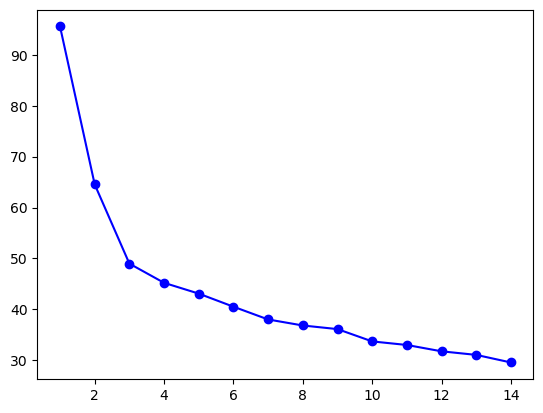

In [248]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wcss, marker='o', linestyle='-', color='blue')

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [250]:
km3 = KMeans(n_clusters=3)
scaled_df['cluster']=km3.fit_predict(scaled_df)   #creating a new column for each data-point as cluster 

In [251]:
scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2


In [252]:
scaled_df['cluster'].unique()

array([2, 1, 0])

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [254]:
center = km3.cluster_centers_
center

array([[0.55371517, 0.50736263, 0.56558666, 0.54851425, 0.3115942 ,
        0.24273158, 0.10101762, 0.60747318, 0.23213954, 0.50808071,
        0.17232584, 0.15628816, 0.24326592],
       [0.3086163 , 0.23849292, 0.47584958, 0.49542734, 0.25490884,
        0.42096774, 0.35837757, 0.45100426, 0.37788745, 0.14243642,
        0.4686074 , 0.56085313, 0.16027794],
       [0.69129555, 0.23837033, 0.57630605, 0.35265662, 0.39765886,
        0.64986737, 0.55485232, 0.29114659, 0.47755399, 0.34826726,
        0.4808005 , 0.68825021, 0.57211676]])

In [255]:
df1 = scaled_df[scaled_df.cluster==0]
df2 = scaled_df[scaled_df.cluster==1]
df3 = scaled_df[scaled_df.cluster==2]

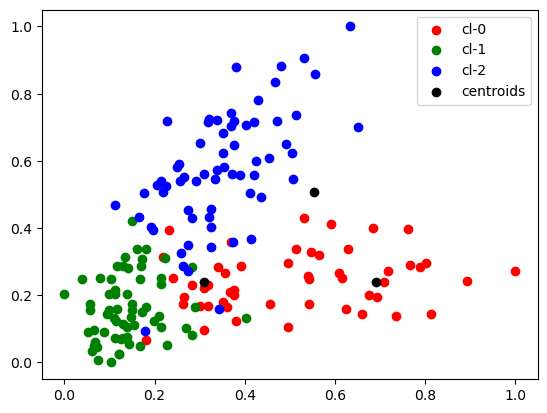

In [256]:
plt.scatter(df1.Color_Intensity,df1.Proline,color='red',label='cl-0')
plt.scatter(df2.Color_Intensity,df2.Proline,color='green',label='cl-1')
plt.scatter(df3.Color_Intensity,df3.Proline,color='blue',label='cl-2')

plt.scatter(center[:,0],center[:,1],color='black',label='centroids')
plt.legend()
plt.show()

In [257]:
df1.to_csv('cluster 0.csv')

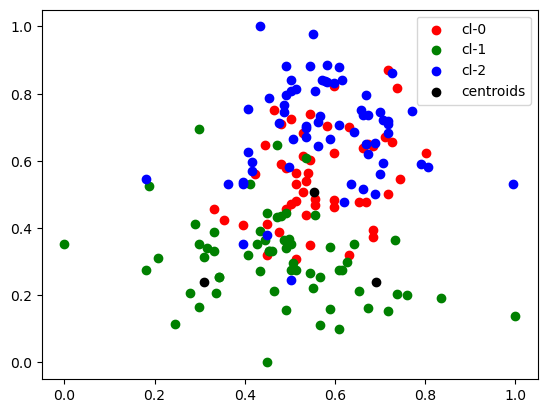

In [258]:
plt.scatter(df1.Ash,df1.Alcohol,color='red',label='cl-0')
plt.scatter(df2.Ash,df2.Alcohol,color='green',label='cl-1')
plt.scatter(df3.Ash,df3.Alcohol,color='blue',label='cl-2')

plt.scatter(center[:,0],center[:,1],color='black',label='centroids')
plt.legend()
plt.show()

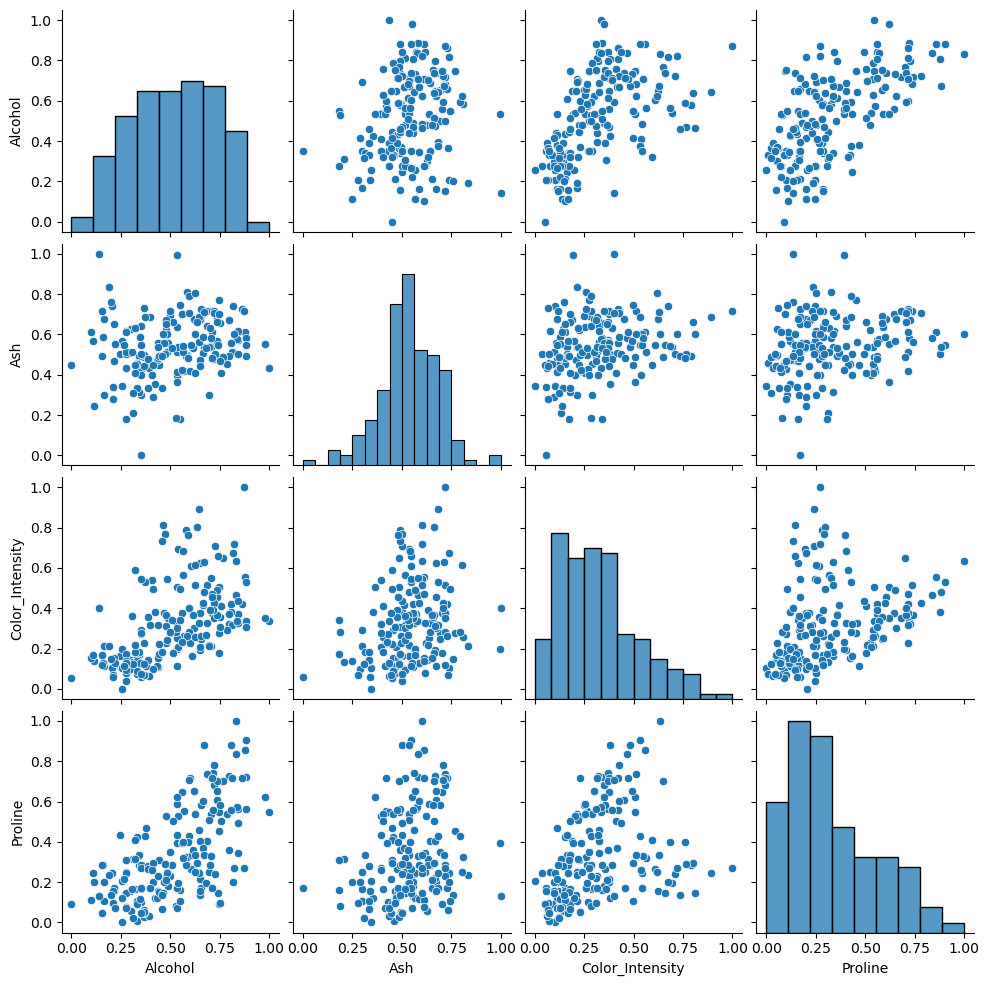

In [259]:
import seaborn as sns
selected_features = ['Alcohol', 'Ash', 'Color_Intensity', 'Proline']
sns.pairplot(scaled_df[selected_features],  palette='Set2')
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

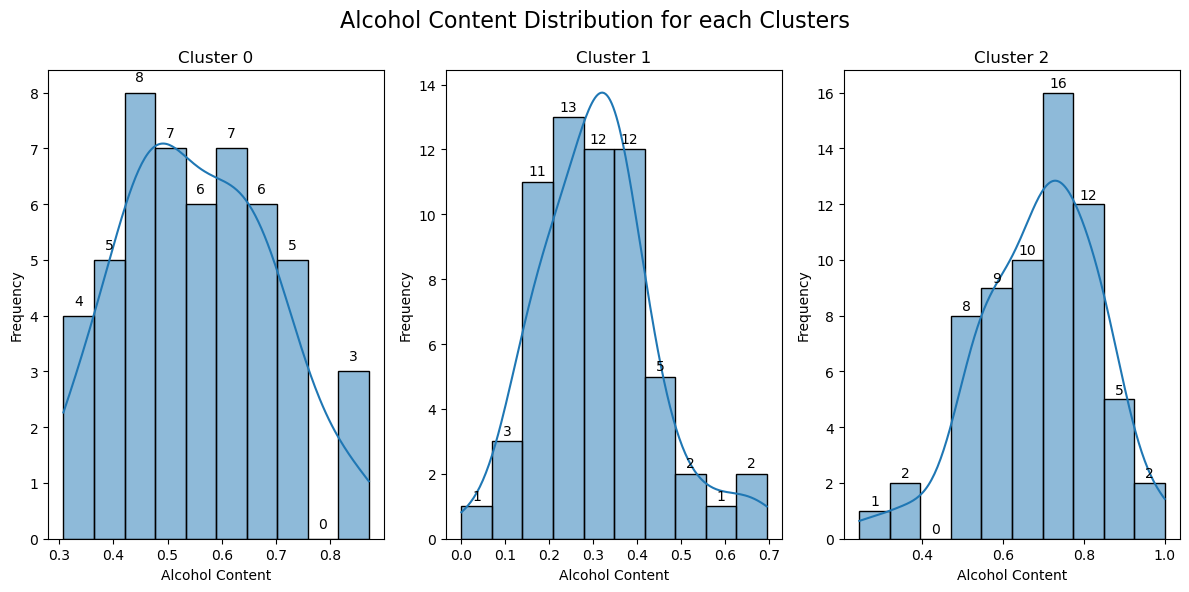

In [262]:
# Ploting separate histograms for each cluster
plt.figure(figsize=(12, 6))
plt.suptitle("Alcohol Content Distribution for each Clusters", fontsize=16)

# Cluster 0
plt.subplot(1, 3, 1)
sns.histplot(df1['Alcohol'], bins=10,kde=True)
plt.title("Cluster 0")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')

# Cluster 1
plt.subplot(1, 3, 2)
sns.histplot(df2['Alcohol'], bins=10,kde=True)
plt.title("Cluster 1")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')

# Cluster 2
plt.subplot(1,3,3 )
sns.histplot(df3['Alcohol'], bins=10,kde=True)
plt.title("Cluster 2")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')
plt.tight_layout()
plt.show()

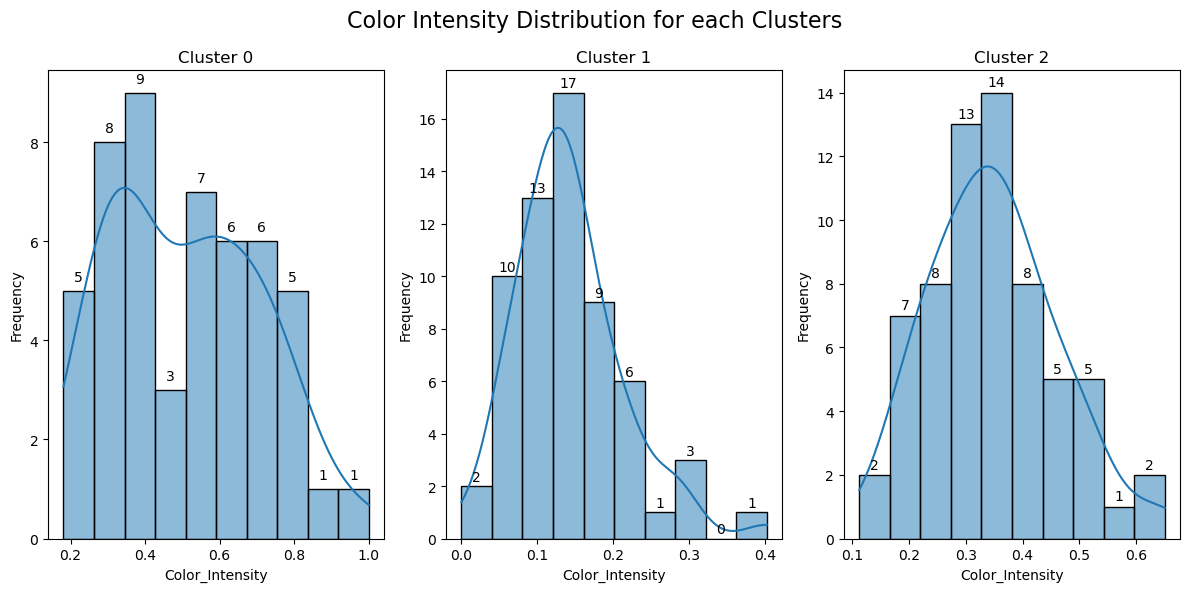

In [264]:
# Ploting separate histograms for each cluster
plt.figure(figsize=(12, 6))
plt.suptitle("Color Intensity Distribution for each Clusters", fontsize=16)

# Cluster 0
plt.subplot(1, 3, 1)
sns.histplot(df1['Color_Intensity'], bins=10,kde=True)
plt.title("Cluster 0")
plt.xlabel("Color_Intensity")
plt.ylabel("Frequency")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')

# Cluster 1
plt.subplot(1, 3, 2)
sns.histplot(df2['Color_Intensity'], bins=10,kde=True)
plt.title("Cluster 1")
plt.xlabel("Color_Intensity")
plt.ylabel("Frequency")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')

# Cluster 2
plt.subplot(1,3,3 )
sns.histplot(df3['Color_Intensity'], bins=10,kde=True)
plt.title("Cluster 2")
plt.xlabel("Color_Intensity")
plt.ylabel("Frequency")

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2,  
             p.get_height()+0.2,          
             int(p.get_height()),           
             ha='center')
plt.tight_layout()
plt.show()

**Alcohol Content Distribution :** Alcohol content contains with 0-1 in wine. Here In cluster 0, there are a wide range of data points have 0.4-0.6 of Alcohol Content. Kde plot suggest there is highest frequency in Alcohol Content in between 0.2-0.4 which indicates the range of common alcohol content for cluster 1. The most frequent Alcohol Content 0.6-0.8 belongs to Cluster 2 which suggest Cluster 2 having higher portion of Alcohol Content in wine.

**Color Intensity :** Color Intensity is mostly low in Cluster 1 and Cluster 2 has a wide range of Color intensity in between 0.2-0.4 .